#  Twitter Sentiment Analysis
### Project by NIVED P | Dataset: Twitter Validation Dataset

>This project analyzes sentiment from tweets expressing opinions about various brands, products, and topics such as tech companies, video games, and consumer goods. The dataset includes tweets where different entities are mentioned, and each tweet is labeled with its sentiment — positive, negative, or neutral. The data is preprocessed using NLP techniques such as tokenization, stemming, and stopword removal. Feature extraction is performed using TF-IDF vectorization, and multiple machine learning classifiers are trained and evaluated to predict the sentiment expressed in each tweet.

## 📦 Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

## 📂 Loading and Inspecting Dataset

In [ ]:
df=pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1')
df.columns=['id','media','target','text']
df.head()

,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.tail()

,id,media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df.isna().sum()

,0
id,0
media,0
target,0
text,0


In [ ]:
df.dtypes

,0
id,int64
media,object
target,object
text,object


## 📊 Exploring Dataset

In [ ]:
df['media'].value_counts()

,count
media,
RedDeadRedemption(RDR),40
johnson&johnson,39
FIFA,38
PlayerUnknownsBattlegrounds(PUBG),38
LeagueOfLegends,37
ApexLegends,36
TomClancysRainbowSix,35
Nvidia,35
GrandTheftAuto(GTA),35


<Axes: xlabel='count', ylabel='media'>

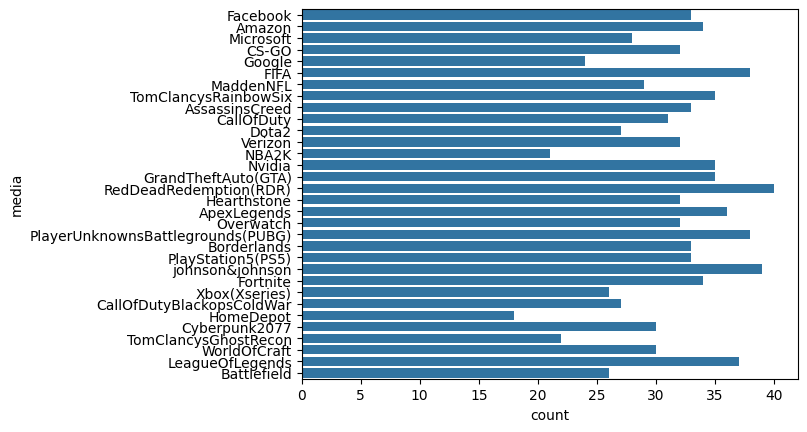

In [ ]:
sns.countplot(y='media',data=df)

In [ ]:
df['target'].value_counts()

,count
target,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


<Axes: xlabel='target', ylabel='count'>

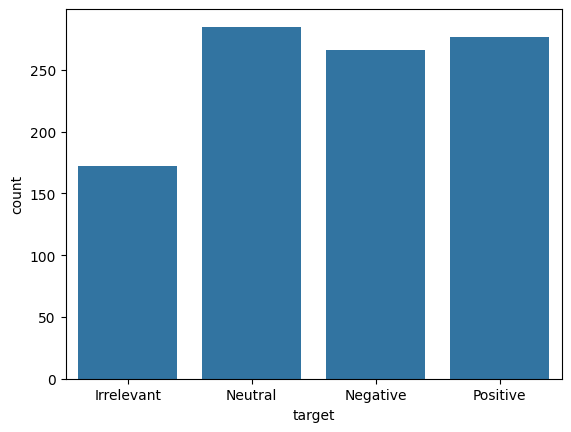

In [ ]:
sns.countplot(x='target',data=df)

## 🔢 Data Cleaning – Dropping Irrelevant Columns

In [ ]:
df.drop(['id','media'],axis=1,inplace=True)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so itâs time to drink wine n pl...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so itâs time to drink wine n pl...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


## ✅ Checking Dataset Types

In [ ]:
df.dtypes

,0
target,int64
text,object


In [ ]:
tweet=df.text

## 📥 Downloading NLTK Resources

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## 🧹 Tokenization Using TweetTokenizer

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweet

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâ   ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible ! How can ...
824,Good on Sony . As much as I want to see the ne...
825,Today sucked so itâ   s time to drink wine n...
826,Bought a fraction of Microsoft today . Small w...


## 🔍 Removing Special Characters

In [ ]:
tweet=tweet.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweet

,text
0,BBC News Amazon boss Jeff Bezos rejects clai...
1,Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi EAHelp I ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible How can ...
824,Good on Sony As much as I want to see the ne...
825,Today sucked so it s time to drink wine n...
826,Bought a fraction of Microsoft today Small w...


## ✅ Removing Short Words

In [ ]:
from nltk.tokenize import TweetTokenizer
tweet=tweet.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w) >= 3]))
tweet

,text
0,BBC News Amazon boss Jeff Bezos rejects claims...
1,Microsoft Why pay for WORD when functions poor...
2,CSGO matchmaking full closet hacking truly awf...
3,Now the President slapping Americans the face ...
4,EAHelp had Madeleine McCann cellar for the pas...
...,...
823,Please explain how this possible How can they ...
824,Good Sony much want see the new PS5 what going...
825,Today sucked time drink wine play borderlands ...
826,Bought fraction Microsoft today Small wins


## 🌱 Applying Stemming

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweet

,text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay for word when function poor ...
2,csgo matchmak full closet hack truli aw game
3,now the presid slap american the face that rea...
4,eahelp had madelein mccann cellar for the past...
...,...
823,pleas explain how this possibl how can they le...
824,good soni much want see the new ps5 what go ri...
825,today suck time drink wine play borderland unt...
826,bought fraction microsoft today small win


## ❌ Removing Stopwords

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweet

,text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay word function poor samsungus...
2,csgo matchmak full closet hack truli aw game
3,presid slap american face realli commit unlaw ...
4,eahelp madelein mccann cellar past year littl ...
...,...
823,pleas explain possibl let compani overcharg sc...
824,good soni much want see new ps5 go right much ...
825,today suck time drink wine play borderland sun...
826,bought fraction microsoft today small win


## 📊 Feature Extraction Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweet)
data

<828x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 10461 stored elements in Compressed Sparse Row format>

## 🎯 Preparing Target Labels

In [ ]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

## 🧑‍💻 Splitting Dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

## 🧠 Initializing Classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier(n_neighbors=7)
nb=MultinomialNB()
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

## 📈 Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lst=[knn,nb,sv,dt,rf]
for i in lst:
  print("The classifier is : ",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('*'*100)
  print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))
  print("Accuracy Score : \n",accuracy_score(y_test,y_pred))
  print("Classification report : \n",classification_report(y_test,y_pred))

The classifier is :  KNeighborsClassifier(n_neighbors=7)
****************************************************************************************************
Confusion matrix : 
 [[57 13  9]
 [35 31 13]
 [46 15 30]]
Accuracy Score : 
 0.4738955823293173
Classification report : 
               precision    recall  f1-score   support

          -1       0.41      0.72      0.53        79
           0       0.53      0.39      0.45        79
           1       0.58      0.33      0.42        91

    accuracy                           0.47       249
   macro avg       0.51      0.48      0.46       249
weighted avg       0.51      0.47      0.46       249

The classifier is :  MultinomialNB()
****************************************************************************************************
Confusion matrix : 
 [[42 27 10]
 [14 44 21]
 [15 22 54]]
Accuracy Score : 
 0.5622489959839357
Classification report : 
               precision    recall  f1-score   support

          -1       0.59 

>The sentiment analysis revealed a predominance of neutral tweets, with SVC delivering the most balanced classification performance.